In [1]:
import pandas as pd

In [2]:
# Load of all .csv
df_ubereats_centro = pd.read_csv(r'csv/ubereats-pizza-centro.csv')
df_ubereats_alamos = pd.read_csv(r'csv/ubereats-pizza-alamos.csv')
df_ubereats_juriquilla = pd.read_csv(r'csv/ubereats-pizza-juriquilla.csv')
df_ubereats_milenio = pd.read_csv(r'csv/ubereats-pizza-milenio.csv')
df_ubereats_refugio = pd.read_csv(r'csv/ubereats-pizza-refugio.csv')

df_ubereats_balvanera = pd.read_csv(r'csv/ubereats-pizza-balvanera.csv')
df_ubereats_campanario = pd.read_csv(r'csv/ubereats-pizza-campanario.csv')
df_ubereats_cerritocolorado = pd.read_csv(r'csv/ubereats-pizza-cerritocolorado.csv')
df_ubereats_cimatario = pd.read_csv(r'csv/ubereats-pizza-cimatario.csv')
df_ubereats_el_pueblito = pd.read_csv(r'csv/ubereats-pizza-el-pueblito.csv')

df_rappi_centro = pd.read_csv(r'csv/rappi-pizza-centro.csv')
df_rappi_alamos = pd.read_csv(r'csv/rappi-pizza-alamos.csv')
df_rappi_juriquilla = pd.read_csv(r'csv/rappi-pizza-juriquilla.csv')
df_rappi_milenio = pd.read_csv(r'csv/rappi-pizza-milenio.csv')
df_rappi_refugio = pd.read_csv(r'csv/rappi-pizza-refugio.csv')

df_rappi_balvanera = pd.read_csv(r'csv/rappi-pizza-balvanera.csv')
df_rappi_campanario = pd.read_csv(r'csv/rappi-pizza-campanario.csv')
df_rappi_cerritocolorado = pd.read_csv(r'csv/rappi-pizza-cerritocolorado.csv')
df_rappi_cimatario = pd.read_csv(r'csv/rappi-pizza-cimatario.csv')
df_rappi_el_pueblito = pd.read_csv(r'csv/rappi-pizza-el-pueblito.csv')

frames = [
    df_ubereats_centro, 
    df_ubereats_alamos, 
    df_ubereats_juriquilla, 
    df_ubereats_milenio, 
    df_ubereats_refugio, 
    df_ubereats_balvanera, 
    df_ubereats_campanario, 
    df_ubereats_cerritocolorado, 
    df_ubereats_cimatario, 
    df_ubereats_el_pueblito, 
    df_rappi_centro, 
    df_rappi_alamos, 
    df_rappi_juriquilla, 
    df_rappi_milenio, 
    df_rappi_refugio, 
    df_rappi_balvanera, 
    df_rappi_campanario, 
    df_rappi_cerritocolorado, 
    df_rappi_cimatario, 
    df_rappi_el_pueblito]

# We concat all frames and ignore the current index to generate a new one
df = pd.concat(frames, ignore_index=True)

In [3]:
print('Size of the df: {} items'.format(df.count()['name']))

Size of the df: 38876 items


In [4]:
# Note that the price-food has MX$
df.loc[:,['name','rating','evals','name-food','price-food']]

,name,rating,evals,name-food,price-food
0,Di Vino,4.5,(64),Lasagna a la boloñesa,$201.50
1,Diktatur (Guerrero),4.9,(10),Molletes de jamón,$60.00
2,The Zone Bread and Coffee,4.8,(26),Frappé,$50.00
3,Papa John's Pizza Jardines,4.7,(161),Hawaiiana,$249.00
4,Micaela Cocina & Café,4.8,(79),De panela,$175.00
...,...,...,...,...,...
38907,Trapani Pizza,4.8,NaN,Sangria Señorial 355 ml,25
38908,Il Pizzaiolo Qro,4.2,NaN,Pasta Amatriciana,119
38909,Pizza Riko,NaN,NaN,Dedos de Queso,97
38910,Estacion 19,NaN,NaN,Cappuccino,52


In [5]:
# Remove MX$ from price-food
df['price-food'] = df['price-food'].apply(lambda x: (float(x[3:] if x[0] == 'M' else x[1:]) if not isinstance(x, int) else float(x)) if not isinstance(x, float) else x)

In [6]:
df.loc[:,['name','name-food','price-food']]

,name,name-food,price-food
0,Di Vino,Lasagna a la boloñesa,201.5
1,Diktatur (Guerrero),Molletes de jamón,60.0
2,The Zone Bread and Coffee,Frappé,50.0
3,Papa John's Pizza Jardines,Hawaiiana,249.0
4,Micaela Cocina & Café,De panela,175.0
...,...,...,...
38907,Trapani Pizza,Sangria Señorial 355 ml,25.0
38908,Il Pizzaiolo Qro,Pasta Amatriciana,119.0
38909,Pizza Riko,Dedos de Queso,97.0
38910,Estacion 19,Cappuccino,52.0


In [7]:
dfPizzas = df[df['name-food'].str.contains("pizza", na=False, case=False)]
dfPizzas.reset_index(drop=True, inplace=True)
dfPizzas.loc[:,['name','name-food','price-food']]

,name,name-food,price-food
0,Güero's Pizza,Pizza Especial Americana - Mediana,303.0
1,Di Vino,Pizza Hawaiana,199.0
2,Che-Chelas,Pizza blanca,160.0
3,Cheeseup pizza,PIZZA EN PAREJA,189.0
4,Lynchburg,Pizza Hawaiana,179.0
...,...,...,...
7790,Estacion 19,Pizza Pompere,114.0
7791,Trapani Pizza,Combo 2 Pizzas Grandes,268.0
7792,Piu Pizza,Pizza Salami,120.0
7793,Mi Piace Pizza Qro,Pizza Hawaiana,125.0


In [50]:
medianPizza = dfPizzas.loc[dfPizzas['price-food'] == dfPizzas['price-food'].median()]

print('The pizzas with the median price are:')
medianPizza.loc[:,['name','name-food','price-food']]

The pizzas with the median price are:


,name,name-food,price-food
22,Ipanema Pizza Buffete,Pizza de Cajeta Helado,175.0
61,Pizza TEC Biagio,Pizza Mexico Grande,175.0
63,Los Dogos (Puerta La Victoria),Pizza Burger,175.0
77,TOSCANO PIZZA & ESPRESSOS,Pizza máxima,175.0
85,Ipanema Pizza Buffete,Pizza Calabresa,175.0
...,...,...,...
7330,Piacere Italiano,Pizza Capricciosa,175.0
7340,La Piccola Italia,Pizza Calzone Champiñones,175.0
7362,Piu Pizza,Pizza con Frutos del Mar,175.0
7388,La Piccola Italia,Pizza La Piccola Italia,175.0


In [8]:
import numpy as np

In [76]:
priceFoodStDesv = np.std(dfPizzas['price-food'])
#priceFoodStDesvM = np.std(dfPizzas['price-food'], ddof = 1)

In [77]:
print(f"Desviación Standar de la población {priceFoodStDesv}")
#print(f"Desviación Standar de la muestra {priceFoodStDesvM}")

Desviación Standar de la población 61.962512044386536


In [78]:
import matplotlib.pyplot as plt

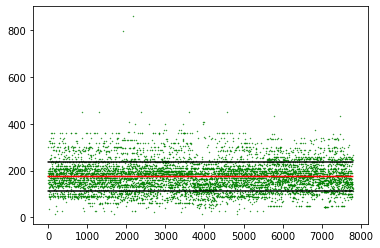

In [88]:
plt.plot(dfPizzas['price-food'],'go', markersize = 0.4)
plt.plot(dfPizzas.index,[175 for x in range(0,len(dfPizzas.index))], 'r')
plt.plot(dfPizzas.index,[(175 + priceFoodStDesv) for i in dfPizzas.index], 'black')
plt.plot(dfPizzas.index,[(175 - priceFoodStDesv) for i in dfPizzas.index], 'black')